#Google Play store Analysis
Objective: Make a model to predict the app rating, with other information about the app provided

In [349]:
#Import the libraries required
import pandas as pd
import numpy as np

In [350]:
#1. Load the data file using pandas
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [351]:
#2.Check for null values in the data. Get the number of null values for each column
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [353]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [354]:
#3. Drop records(rows) with nulls in any of the columns and name the dataframe as df_new
df_new = df.dropna(axis=0, how='any')

In [355]:
df_new.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [356]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [357]:
df_new.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [358]:
#4. Correcting incorrect type and inconsistent formatting
#4.1. Changing Size to Kb and numeric data
df_new.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [359]:
df_new.Size.loc[(df_new.Size.str.contains('Varies with device'))].value_counts()

Varies with device    1637
Name: Size, dtype: int64

In [360]:
df_new.Size.loc[(df_new.Size.str.endswith('+'))].value_counts()

Series([], Name: Size, dtype: int64)

In [361]:
#Taking a copy of the size column to make changes
df_new_copy = df_new['Size'].copy(deep=True)
df_new_copy.head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [362]:
#Finding the indexes of rows ending with M, k, varies with device
size_M = df_new_copy.str.endswith('M')
size_k = df_new_copy.str.endswith('k')
size_text = df_new_copy.str.match('Varies with device')

In [363]:
#if the records ends with M => multiply by 1000, ends with k => pick numeric data having 'Varies with device' => fill with NA
df_new_copy[size_M] = (df_new_copy[size_M].apply(lambda x: float(x[:-1]) * 1000))
df_new_copy[size_k] = (df_new_copy[size_k].apply(lambda x: float(x[:-1])))
df_new_copy[size_text] = np.nan

In [364]:
df_new_copy.head()

0    19000
1    14000
2     8700
3    25000
4     2800
Name: Size, dtype: object

In [365]:
df_new_copy.values

array([19000.0, 14000.0, 8700.0, ..., 3600.0, nan, 19000.0], dtype=object)

In [366]:
#Copying the dataframe to a new variable 'playstore' and performing the following steps to avoid 'Settingwithcopywarning'
playstore = df_new.copy()

In [367]:
result = df_new_copy.copy()

In [368]:
playstore.loc[:,'Size'] = result

In [369]:
playstore['Size'].astype(float) #changing the datatype from 'object' to 'float'

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10834     2600.0
10836    53000.0
10837     3600.0
10839        NaN
10840    19000.0
Name: Size, Length: 9360, dtype: float64

In [370]:
#Checking how many 'NA' values in Size column
playstore['Size'].isna().sum()

1637

In [371]:
#Replacing 'NA' values in size column with mean of the values in Size column
playstore['Size'].fillna(playstore['Size'].mean(),inplace=True)

In [372]:
#Changing the datatype to 'integer'
playstore['Size']=playstore['Size'].astype(int)

In [373]:
playstore['Size']

0        19000
1        14000
2         8700
3        25000
4         2800
         ...  
10834     2600
10836    53000
10837     3600
10839    22970
10840    19000
Name: Size, Length: 9360, dtype: int64

In [374]:
playstore['Size'].isna().sum()

0

In [375]:
#4.2. converting Reviews column from string to numeric field
playstore['Reviews'] = playstore['Reviews'].astype(int)

In [376]:
playstore['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 9360, dtype: int64

In [377]:
#4.3.Changing Installs field and removing + and ,
playstore['Installs'].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [378]:
playstore.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [379]:
playstore['Installs']=playstore.Installs.apply(lambda x: x.strip('+'))
playstore['Installs']=playstore.Installs.apply(lambda x: x.replace(',',''))
playstore['Installs']=playstore.Installs.replace('Free',np.nan)
playstore['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: object

In [380]:
#converting datatype of 'Installs' to integer type
playstore['Installs'] = playstore['Installs'].astype(int)
playstore.Installs.head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

In [381]:
#4.4 Removing '$' sign from 'Price' field and changing datatype to 'integer'
playstore.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [382]:
playstore['Price']=playstore.Price.apply(lambda x: x.strip('$'))
playstore.Price.unique()

array(['0', '4.99', '3.99', '6.99', '7.99', '5.99', '2.99', '3.49',
       '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00', '24.99',
       '11.99', '79.99', '16.99', '14.99', '29.99', '12.99', '2.49',
       '10.99', '1.50', '19.99', '15.99', '33.99', '39.99', '3.95',
       '4.49', '1.70', '8.99', '1.49', '3.88', '399.99', '17.99',
       '400.00', '3.02', '1.76', '4.84', '4.77', '1.61', '2.50', '1.59',
       '6.49', '1.29', '299.99', '379.99', '37.99', '18.99', '389.99',
       '8.49', '1.75', '14.00', '2.00', '3.08', '2.59', '19.40', '3.90',
       '4.59', '15.46', '3.04', '13.99', '4.29', '3.28', '4.60', '1.00',
       '2.95', '2.90', '1.97', '2.56', '1.20'], dtype=object)

In [383]:
#converting to numeric type
playstore['Price'] = playstore['Price'].astype(float)
playstore.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

In [384]:
#5.1.Average rating should be between 1 and 5
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [385]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   int64  
 4   Size            9360 non-null   int64  
 5   Installs        9360 non-null   int64  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   float64
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 1023.8+ KB


In [386]:
#There is no record having rating outside the limits of 1 to 5
playstore[((playstore['Rating'] < 1) & (playstore['Rating'] > 5))]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [387]:
playstore[((playstore['Rating'] >= 1) & (playstore['Rating'] <= 5))]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,22970,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [388]:
#5.2. review should not be more than installs
playstore[playstore.Reviews > playstore.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,22970,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [389]:
#There are seven rows with Reviews more than Installs and hence dropping those rows
playstore.drop(playstore[(playstore.Reviews > playstore.Installs)].index, inplace=True)
playstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9353 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9353 non-null   object 
 1   Category        9353 non-null   object 
 2   Rating          9353 non-null   float64
 3   Reviews         9353 non-null   int64  
 4   Size            9353 non-null   int64  
 5   Installs        9353 non-null   int64  
 6   Type            9353 non-null   object 
 7   Price           9353 non-null   float64
 8   Content Rating  9353 non-null   object 
 9   Genres          9353 non-null   object 
 10  Last Updated    9353 non-null   object 
 11  Current Ver     9353 non-null   object 
 12  Android Ver     9353 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 1023.0+ KB


In [390]:
#5.3.price should not greater than zero for free apps
#There is no record having price > 0 with type = 'Free'
playstore[(playstore.Type == 'Free') &  (playstore.Price > 0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [391]:
playstore[(playstore.Type == 'Free') &  (playstore.Price == 0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,22970,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [392]:
playstore.Type.unique()

array(['Free', 'Paid'], dtype=object)

In [393]:
playstore[(playstore.Type == 'Paid')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,22970,100000,Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10682,Fruit Ninja Classic,GAME,4.3,85468,36000,1000000,Paid,0.99,Everyone,Arcade,"June 8, 2018",2.4.1.485300,4.0.3 and up
10690,FO Bixby,PERSONALIZATION,5.0,5,861,100,Paid,0.99,Everyone,Personalization,"April 25, 2018",0.2,7.0 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2400,1000,Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252,11000,10000,Paid,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up


In [394]:
playstore.shape

(9353, 13)

In [395]:
#6. Performing Univariate analysis

In [396]:
#Importing the libraries for visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

In [397]:
style.use("ggplot")

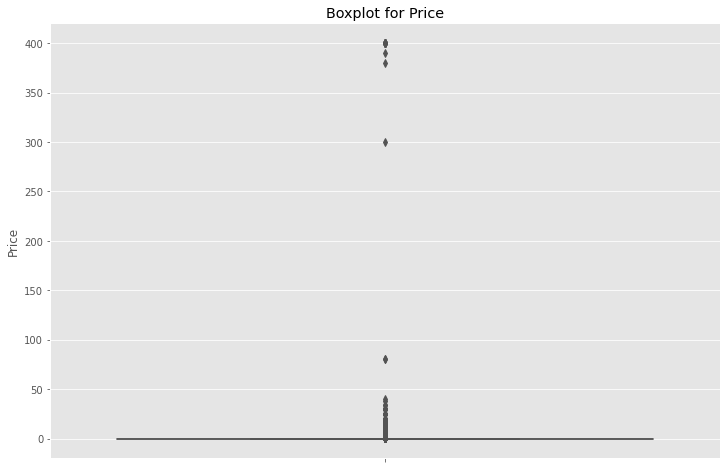

In [398]:
#6.1. Boxplot for Price
plt.figure(figsize=(12,8))
sns.boxplot(y=playstore['Price'])
plt.title('Boxplot for Price')
plt.show()

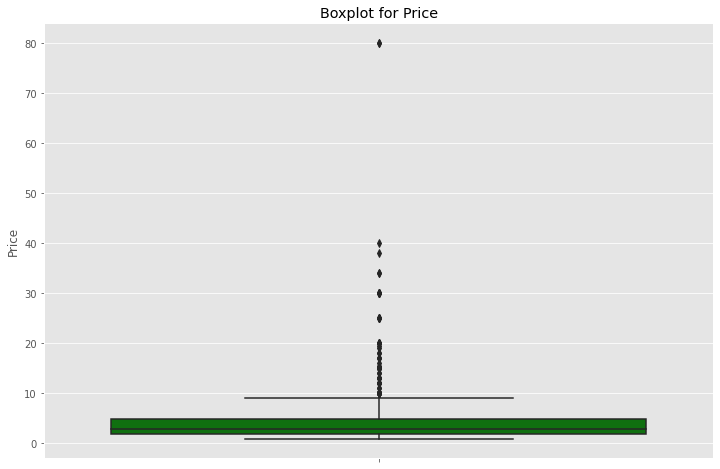

In [458]:
#Since most of the apps are free, the price values are zero for a number of rows, we are unable to see the boxplot in the above 
#plot, hence excluded the apps with zero price inorder to get a good understanding of the outliers
plt.figure(figsize=(12,8))
exp = playstore[(playstore.Price > 0)]
sns.boxplot(y=exp.Price, color = 'green')
plt.title('Boxplot for Price')
plt.show()

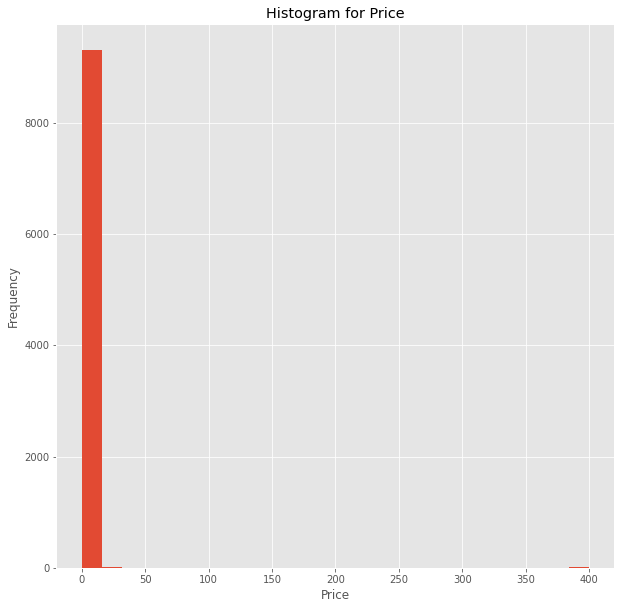

In [400]:
#Due to large variation in Price range, we are unable to view the boxplot perfectly and hence using Histogtram for Price 
#to check for outliers
plt.figure(figsize=(10,10))
plt.hist(playstore.Price, bins=25)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram for Price')
plt.show()

#There are some apps with price between $350 to $400 which is way more than the average

In [401]:
playstore[playstore['Price'] > 200]['Price'].value_counts()

399.99    11
389.99     1
379.99     1
299.99     1
400.00     1
Name: Price, dtype: int64

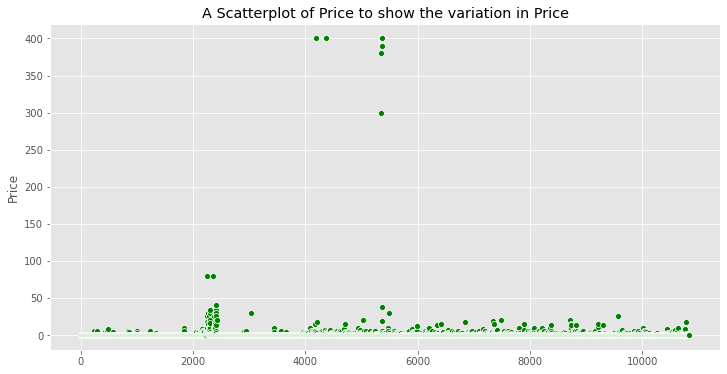

In [402]:
plt.figure(figsize=(12,6))
sns.scatterplot(data = playstore['Price'], color = 'green')
plt.ylabel('Price')
plt.title('A Scatterplot of Price to show the variation in Price')
plt.show()

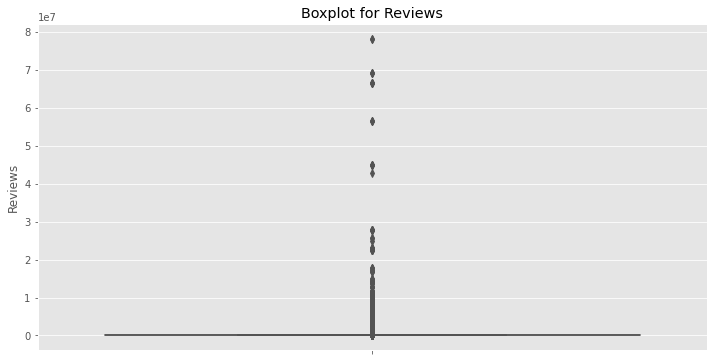

In [403]:
#6.2. Boxplot for Reviews
plt.figure(figsize=(12,6))
sns.boxplot(y=playstore['Reviews'])
plt.title('Boxplot for Reviews')
plt.show()

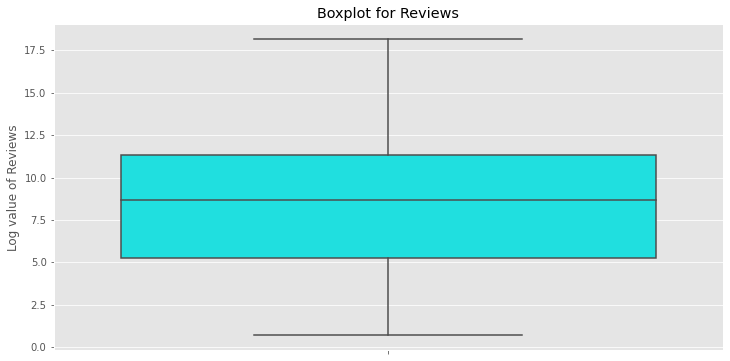

In [404]:
#Due to large range of Reviews values, the bosplot is not properly displayed, so taking 
#logarithmic values of Reviews to get the visaulaisation
changeReview = playstore['Reviews'].copy()
logReview = np.log1p(changeReview)

plt.figure(figsize=(12,6))
sns.boxplot(y=logReview, color = 'cyan')
plt.ylabel('Log value of Reviews')
plt.title('Boxplot for Reviews')
plt.show()

In [405]:
playstore.Reviews.max()

78158306

In [406]:
playstore.Reviews.min()

1

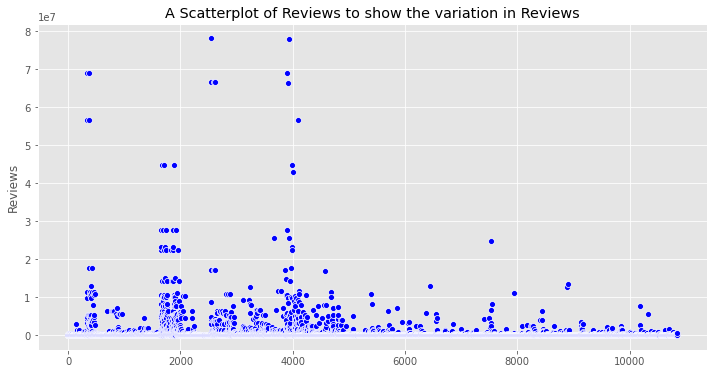

In [407]:
#Due to large variation in Reviews range, we are unable to view the boxplot perfectly and hence using Scatterplot for Reviews
#to check for outliers

plt.figure(figsize=(12,6))
sns.scatterplot(data = playstore['Reviews'], color = 'blue')
plt.ylabel('Reviews')
plt.title('A Scatterplot of Reviews to show the variation in Reviews')
plt.show()

#There are some apps with high Reviews which is way more than the average

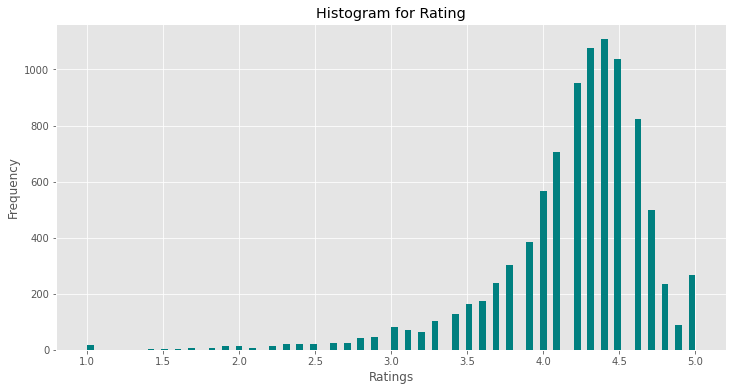

In [408]:
#6.3. Histogram for Rating
plt.figure(figsize=(12,6))
plt.hist(playstore.Rating, bins=90, color='teal')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Histogram for Rating')
plt.show()

#The ratings are highly distributed towards the higher value of ratings

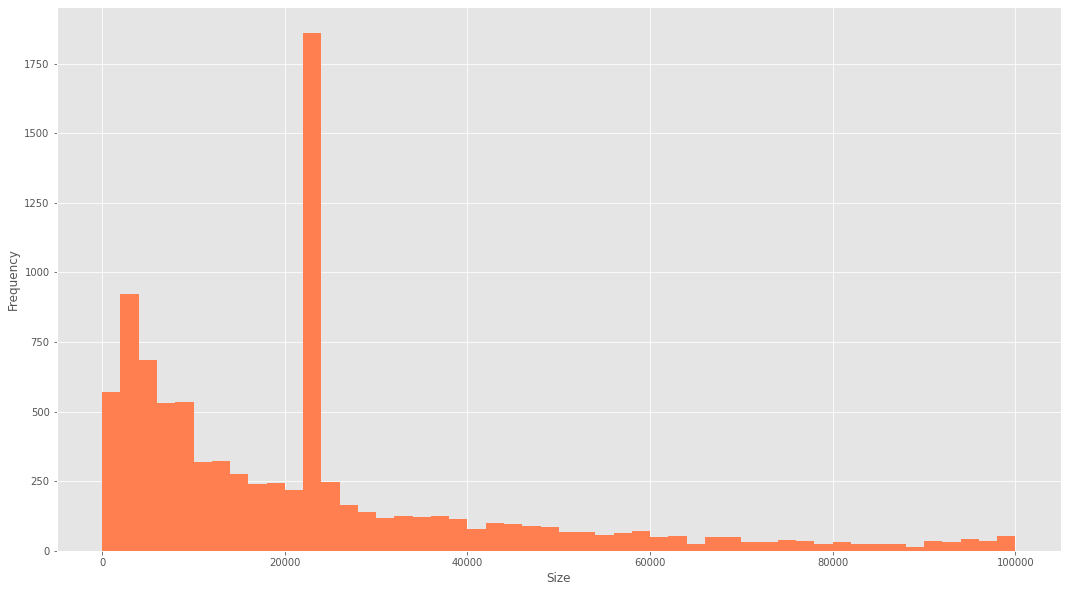

In [409]:
#6.4. Histogram for Size
plt.figure(figsize=(18,10))
plt.hist(playstore.Size, bins=50, color='coral')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()

#The size value between 20000 and 250000 is most frequently used compared to other apps with varying sizes

In [410]:
#Outlier Treatment

In [411]:
#1.Price
playstore[playstore.Price > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [412]:
#Removing records having Price greater than $200 as most of them are junk apps
playstore.drop(playstore[(playstore.Price > 200)].index, inplace=True)
playstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9338 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9338 non-null   object 
 1   Category        9338 non-null   object 
 2   Rating          9338 non-null   float64
 3   Reviews         9338 non-null   int64  
 4   Size            9338 non-null   int64  
 5   Installs        9338 non-null   int64  
 6   Type            9338 non-null   object 
 7   Price           9338 non-null   float64
 8   Content Rating  9338 non-null   object 
 9   Genres          9338 non-null   object 
 10  Last Updated    9338 non-null   object 
 11  Current Ver     9338 non-null   object 
 12  Android Ver     9338 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 1021.3+ KB


In [413]:
playstore[playstore.Price > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [414]:
#6.2. Reviews

In [415]:
#checking for apps with more than 2 million reviews
playstore[playstore.Reviews > 2000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,22970,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,22970,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,22970,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,22970,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,22970,1000000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,Modern Combat 5: eSports FPS,GAME,4.3,2903386,58000,100000000,Free,0.0,Mature 17+,Action,"July 24, 2018",3.2.1c,4.0 and up
9841,Google Earth,TRAVEL_AND_LOCAL,4.3,2339098,22970,100000000,Free,0.0,Everyone,Travel & Local,"June 18, 2018",9.2.17.13,4.1 and up
10186,Farm Heroes Saga,FAMILY,4.4,7615646,71000,100000000,Free,0.0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up
10190,Fallout Shelter,FAMILY,4.6,2721923,25000,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up


In [416]:
#Removing the apps with more than 2 million reviews as they are mostly star apps and including their data in training the model 
#may skew the model
playstore.drop(playstore[(playstore.Reviews > 2000000)].index, inplace=True)
playstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8885 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8885 non-null   object 
 1   Category        8885 non-null   object 
 2   Rating          8885 non-null   float64
 3   Reviews         8885 non-null   int64  
 4   Size            8885 non-null   int64  
 5   Installs        8885 non-null   int64  
 6   Type            8885 non-null   object 
 7   Price           8885 non-null   float64
 8   Content Rating  8885 non-null   object 
 9   Genres          8885 non-null   object 
 10  Last Updated    8885 non-null   object 
 11  Current Ver     8885 non-null   object 
 12  Android Ver     8885 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 971.8+ KB


In [417]:
#6.3 Installs

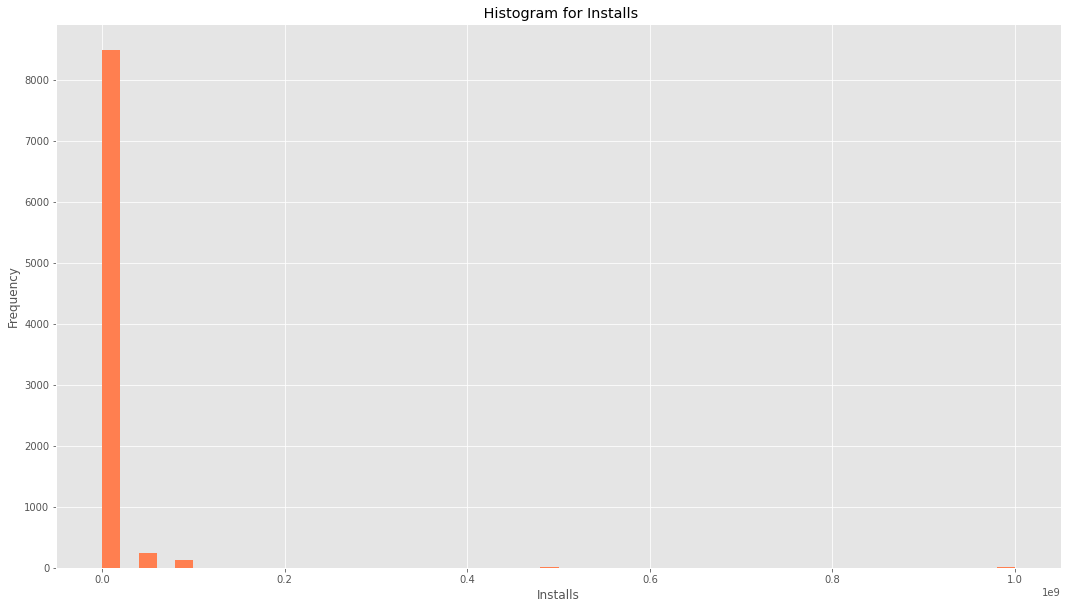

In [418]:
#To find the outliers in the 'installs' field using Histogram
plt.figure(figsize=(18,10))
plt.hist(playstore.Installs, bins=50, color='coral')
plt.xlabel('Installs')
plt.ylabel('Frequency')
plt.title(' Histogram for Installs')
plt.show()

In [419]:
#Finding different percentiles to find the threshold to drop the outlier values
def Percentile_installs(x):
    return playstore.Installs.quantile(x)
percent = [10,25,50,70,90,95,99]
for count,value in enumerate(percent):
    print('Percentile', value, ':', Percentile_installs(value/100))

Percentile 10 : 1000.0
Percentile 25 : 10000.0
Percentile 50 : 500000.0
Percentile 70 : 1000000.0
Percentile 90 : 10000000.0
Percentile 95 : 10000000.0
Percentile 99 : 100000000.0


In [420]:
def PercentileNumpy_installs(x):
    return np.percentile(playstore['Installs'],x)
percent = [10,25,50,70,90,95,99]
for count,value in enumerate(percent):
    print('Percentile', value, ':', PercentileNumpy_installs(value))

Percentile 10 : 1000.0
Percentile 25 : 10000.0
Percentile 50 : 500000.0
Percentile 70 : 1000000.0
Percentile 90 : 10000000.0
Percentile 95 : 10000000.0
Percentile 99 : 100000000.0


In [421]:
#Considering 90th percentile as threshold
playstore[(playstore.Installs > 10000000)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
143,Amazon Kindle,BOOKS_AND_REFERENCE,4.2,814080,22970,100000000,Free,0.0,Teen,Books & Reference,"July 27, 2018",Varies with device,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,22970,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
188,Indeed Job Search,BUSINESS,4.3,674730,22970,50000000,Free,0.0,Everyone,Business,"May 21, 2018",Varies with device,Varies with device
192,Docs To Go™ Free Office Suite,BUSINESS,4.1,217730,22970,50000000,Free,0.0,Everyone,Business,"April 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10429,Talking Tom Bubble Shooter,FAMILY,4.4,687136,54000,50000000,Free,0.0,Everyone,Casual,"May 25, 2018",1.5.3.20,4.1 and up
10513,Flight Simulator: Fly Plane 3D,FAMILY,4.0,660613,21000,50000000,Free,0.0,Everyone,Simulation,"March 1, 2017",1.32,2.3 and up
10549,Toy Truck Rally 3D,GAME,4.0,301895,25000,50000000,Free,0.0,Everyone,Racing,"May 23, 2018",1.4.4,4.1 and up
10647,Motorola FM Radio,VIDEO_PLAYERS,3.9,54815,22970,100000000,Free,0.0,Everyone,Video Players & Editors,"May 2, 2018",Varies with device,Varies with device


In [422]:
#Dropping rows with more than 100000000 Installs
playstore.drop(playstore[(playstore.Installs > 10000000)].index, inplace=True)
playstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8496 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8496 non-null   object 
 1   Category        8496 non-null   object 
 2   Rating          8496 non-null   float64
 3   Reviews         8496 non-null   int64  
 4   Size            8496 non-null   int64  
 5   Installs        8496 non-null   int64  
 6   Type            8496 non-null   object 
 7   Price           8496 non-null   float64
 8   Content Rating  8496 non-null   object 
 9   Genres          8496 non-null   object 
 10  Last Updated    8496 non-null   object 
 11  Current Ver     8496 non-null   object 
 12  Android Ver     8496 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 929.2+ KB


In [423]:
#7.Bivariate Analysis

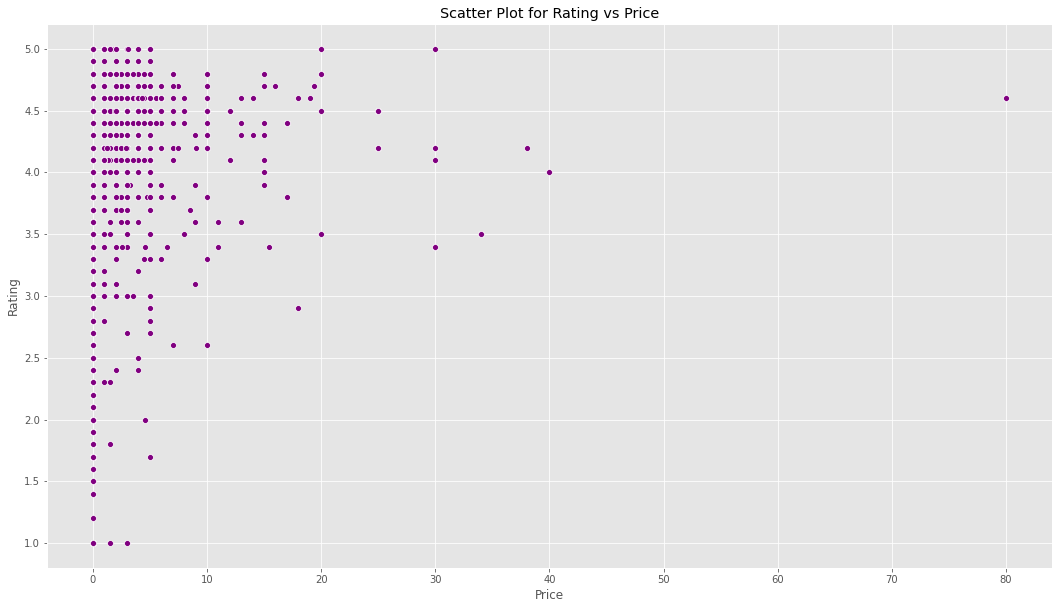

In [424]:
#7.1. Rating vs Price - Scatter plot
plt.figure(figsize=(18,10))
sns.scatterplot(y=playstore.Rating,x=playstore.Price, color = 'purple')
plt.title('Scatter Plot for Rating vs Price')
plt.show()

# When Price increases, Rating is mostly on the higher side

<Figure size 1080x1080 with 0 Axes>

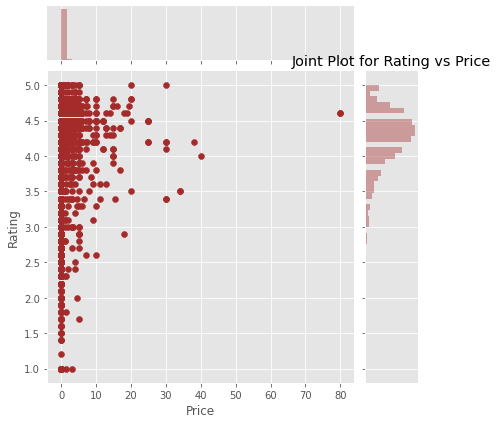

In [425]:
#7.1. Rating vs Price - Joint plot
plt.figure(figsize=(15,15))
sns.jointplot(y=playstore.Rating,x=playstore.Price, kind='scatter', color='brown')
plt.title('Joint Plot for Rating vs Price')
plt.show()

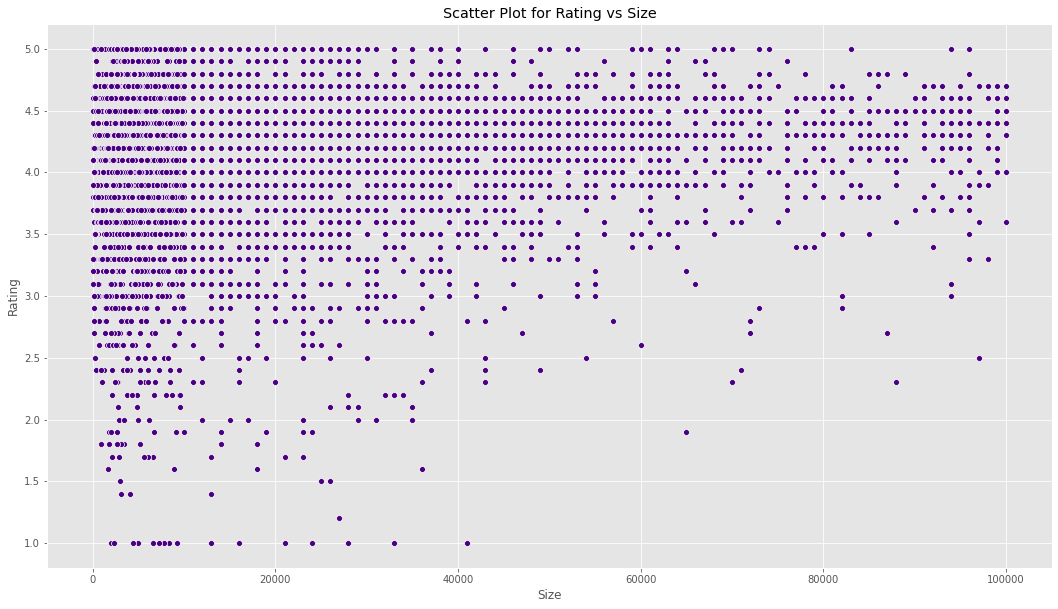

In [426]:
#7.2. Rating vs Size - Scatter plot
plt.figure(figsize=(18,10))
sns.scatterplot(y=playstore.Rating,x=playstore.Size, color='indigo')
plt.title('Scatter Plot for Rating vs Size')
plt.show()

# The heavier apps are rated better compared to that of the lighter apps

<Figure size 432x720 with 0 Axes>

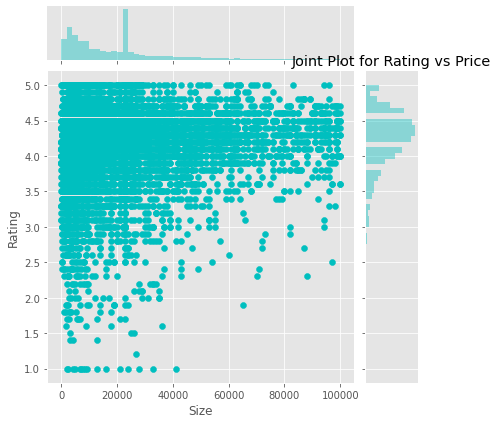

In [427]:
#7.2. Rating vs Size - Joint plot
plt.figure(figsize=(6,10))
sns.jointplot(y=playstore.Rating,x=playstore.Size, color ='c')
plt.title('Joint Plot for Rating vs Price')
plt.show()

<Figure size 720x720 with 0 Axes>

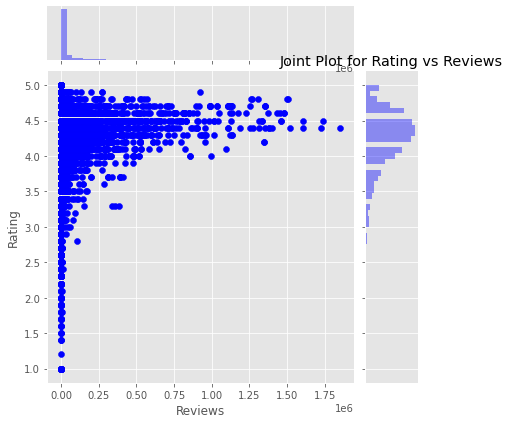

In [428]:
#7.3. Rating vs Reviews - Joint plot
plt.figure(figsize=(10,10))
sns.jointplot(y=playstore.Rating,x=playstore.Reviews, kind='scatter', color='b')
plt.title('Joint Plot for Rating vs Reviews')
plt.show()

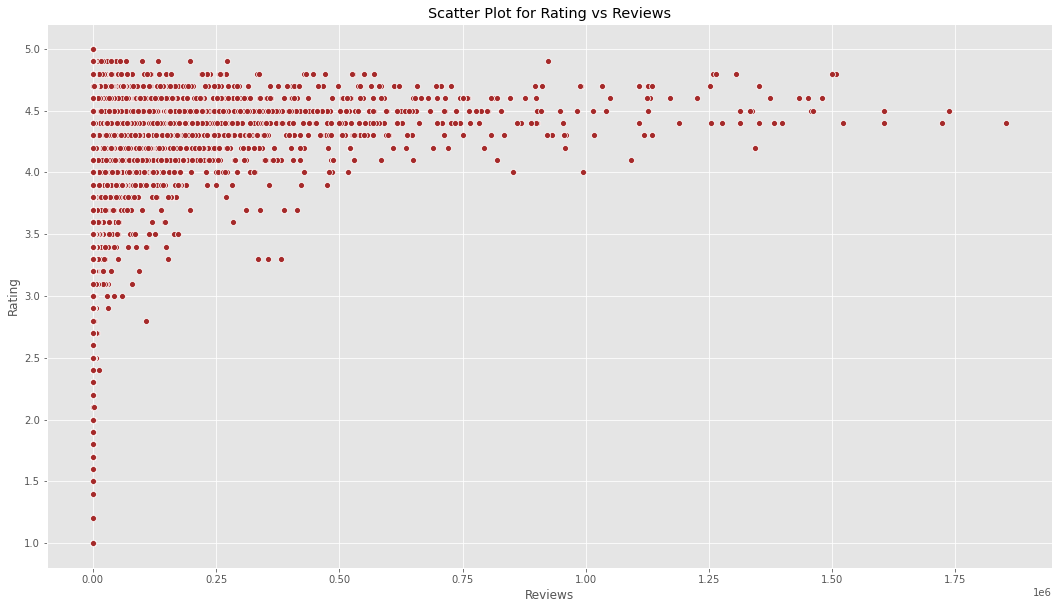

In [429]:
#7.3. Rating vs Reviews - Scatter plot
plt.figure(figsize=(18,10))
sns.scatterplot(y=playstore.Rating,x=playstore.Reviews, color='brown')
plt.title('Scatter Plot for Rating vs Reviews')
plt.show()

# When there is a large number of reviews, the rating is always high

In [430]:
playstore['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

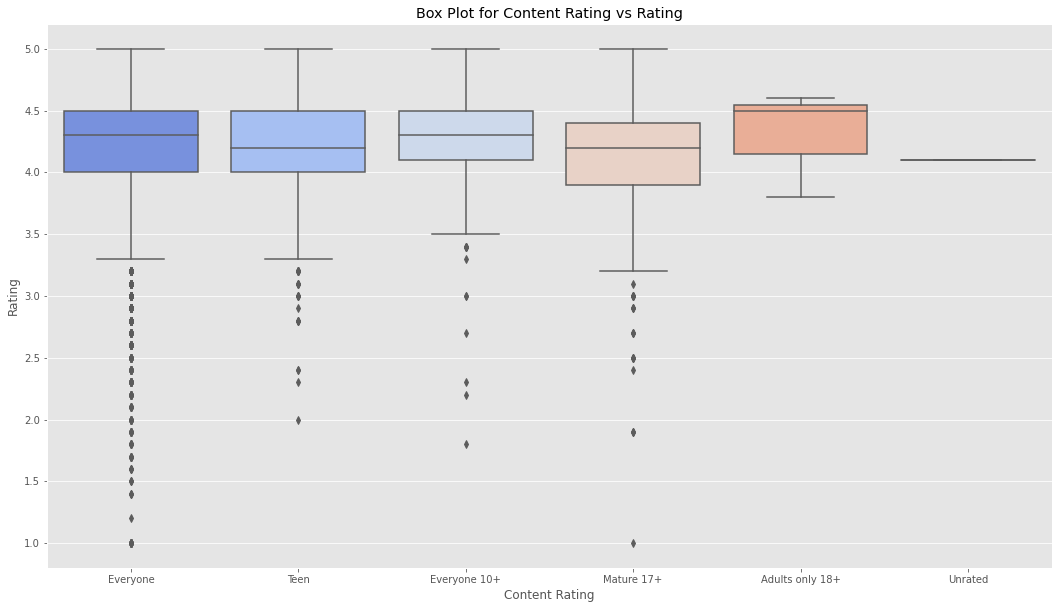

In [431]:
#7.4 Boxplot for Rating vs Content Rating
plt.figure(figsize=(18,10))
sns.boxplot(y=playstore.Rating,x=playstore['Content Rating'], palette='coolwarm')
plt.title('Box Plot for Content Rating vs Rating')
plt.show()

# The ratings are nearly same( between 4.0 and 4.5) for Everyone, Teen and Everyone 10+ contents. But, there is a difference 
#in ratings for Mature 17+ and Adults only 18+ contents

In [432]:
type(playstore['Category'][0])

str

In [433]:
playstore.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

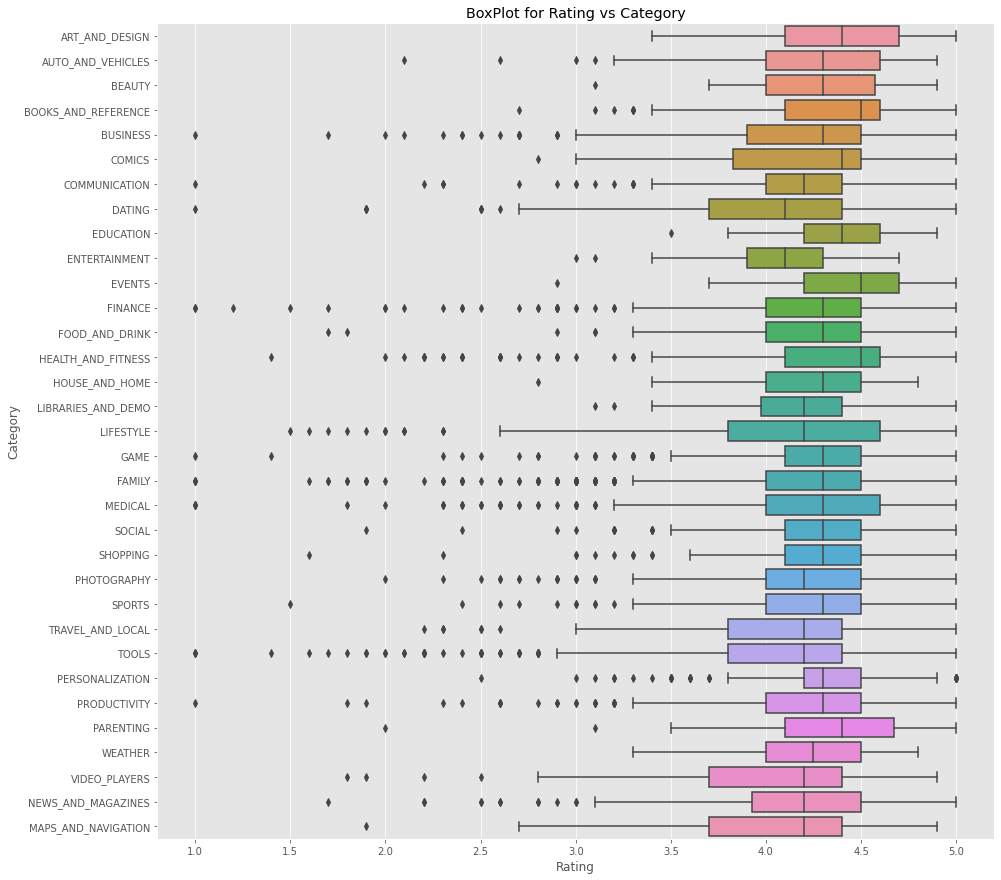

In [434]:
#7.5 Boxplot for Rating vs Category
plt.figure(figsize=(15,15))
sns.boxplot(x=playstore.Rating,y=playstore['Category'])
plt.title('BoxPlot for Rating vs Category')
plt.show()
 
# We can see that 'Personalization', 'Events', 'Education' and 'Art and design' has the best ratings compared to others.

In [435]:
# Other Visualisations
res=playstore.groupby('Category')['Rating'].sum()
res

Category
ART_AND_DESIGN          262.5
AUTO_AND_VEHICLES       305.9
BEAUTY                  179.7
BOOKS_AND_REFERENCE     742.9
BUSINESS               1207.1
COMICS                  241.0
COMMUNICATION           997.5
DATING                  774.3
EDUCATION               661.5
ENTERTAINMENT           546.3
EVENTS                  199.6
FAMILY                 6958.8
FINANCE                1285.4
FOOD_AND_DRINK          454.2
GAME                   3570.6
HEALTH_AND_FITNESS     1238.2
HOUSE_AND_HOME          319.0
LIBRARIES_AND_DEMO      267.5
LIFESTYLE              1254.6
MAPS_AND_NAVIGATION     476.2
MEDICAL                1461.2
NEWS_AND_MAGAZINES      916.8
PARENTING               215.0
PERSONALIZATION        1253.2
PHOTOGRAPHY            1026.2
PRODUCTIVITY           1189.7
SHOPPING                879.7
SOCIAL                  904.6
SPORTS                 1286.8
TOOLS                  2705.4
TRAVEL_AND_LOCAL        837.1
VIDEO_PLAYERS           542.6
WEATHER                 296.2
N

In [436]:
# Exploring Crosstab
pd.crosstab(playstore.Category,playstore.Rating,margins=True)

Rating,1.0,1.2,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,...,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,All
Category,,,,,,,,,,,,,,,,,,,,,
ART_AND_DESIGN,0,0,0,0,0,0,0,0,0,0,...,7,4,8,3,3,13,5,0,1,60
AUTO_AND_VEHICLES,0,0,0,0,0,0,0,0,0,1,...,7,7,6,5,11,0,5,5,0,73
BEAUTY,0,0,0,0,0,0,0,0,0,0,...,4,3,3,5,3,6,1,1,0,42
BOOKS_AND_REFERENCE,0,0,0,0,0,0,0,0,0,0,...,12,9,18,24,22,20,11,4,6,171
BUSINESS,1,0,0,0,0,1,0,0,1,1,...,28,25,37,20,19,16,10,3,18,293
COMICS,0,0,0,0,0,0,0,0,0,0,...,4,1,9,8,4,5,2,0,2,58
COMMUNICATION,1,0,0,0,0,0,0,0,0,0,...,32,38,29,16,9,1,6,0,5,243
DATING,1,0,0,0,0,0,0,3,0,0,...,24,7,19,7,4,7,7,1,6,195
EDUCATION,0,0,0,0,0,0,0,0,0,0,...,19,20,21,20,24,17,2,2,0,151


In [437]:
res=playstore.groupby('Category')['Rating'].count()
res.index

Index(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE',
       'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION',
       'ENTERTAINMENT', 'EVENTS', 'FAMILY', 'FINANCE', 'FOOD_AND_DRINK',
       'GAME', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO',
       'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES',
       'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY',
       'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL',
       'VIDEO_PLAYERS', 'WEATHER'],
      dtype='object', name='Category')

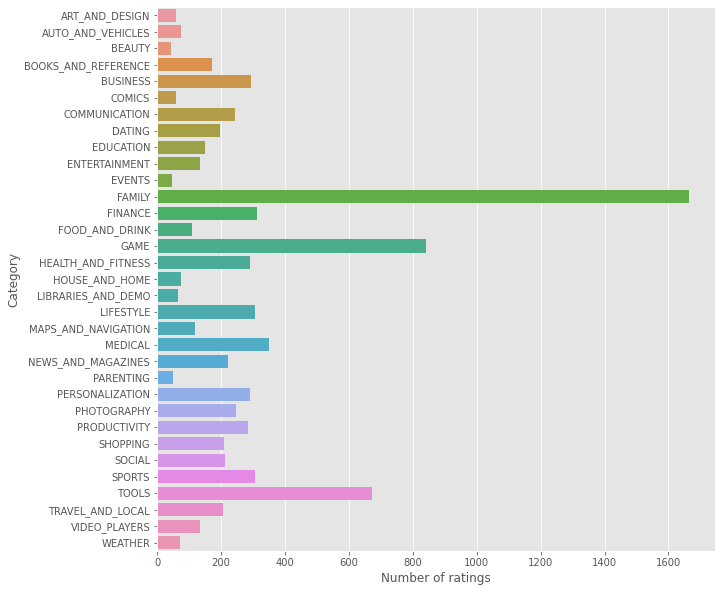

In [438]:
plt.figure(figsize=(10,10))
sns.barplot(y=res.index,x=res)
plt.xlabel('Number of ratings')
plt.show()

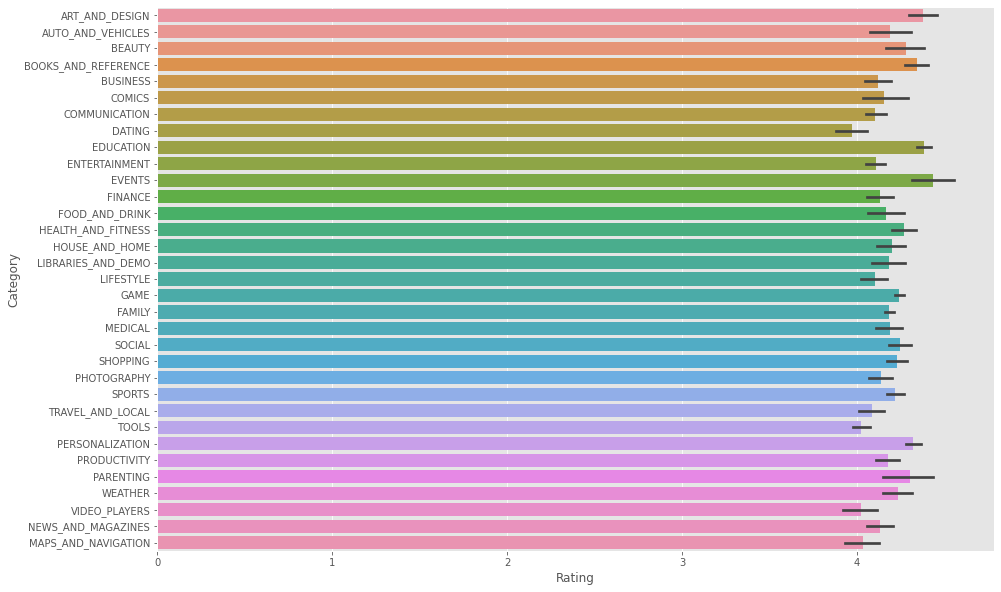

In [439]:
plt.figure(figsize=(15,10))
sns.barplot(y=playstore.Category,x=playstore.Rating)
plt.show()

In [440]:
#8. Data Preprocessing
# Creating copy of dataframe and naming it as inp1
inp1 = playstore.copy(deep=True)

In [441]:
inp1.Reviews.head()

0      159
1      967
2    87510
4      967
5      167
Name: Reviews, dtype: int64

In [442]:
#8.1. Applying log transformation to Reviews to reduce the skew
inp1.Reviews = np.log1p(inp1.Reviews)
inp1.Reviews.head()

0     5.075174
1     6.875232
2    11.379520
4     6.875232
5     5.123964
Name: Reviews, dtype: float64

In [443]:
inp1.Installs.head()

0      10000
1     500000
2    5000000
4     100000
5      50000
Name: Installs, dtype: int64

In [444]:
#8.1. Applying log transformation to Installa to reduce the skew
inp1.Installs = np.log1p(inp1.Installs)
inp1.Installs.head()

0     9.210440
1    13.122365
2    15.424949
4    11.512935
5    10.819798
Name: Installs, dtype: float64

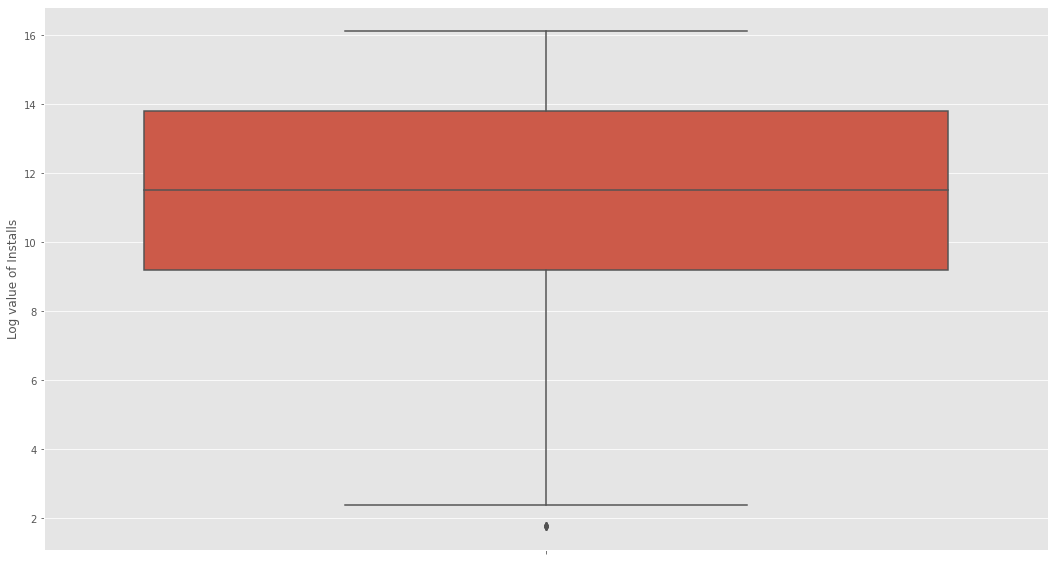

In [445]:
plt.figure(figsize=(18,10))
sns.boxplot(y=inp1.Installs)
plt.ylabel('Log value of Installs')
plt.show()

In [446]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000,9.210440,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700,15.424949,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800,11.512935,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,5.123964,5600,10.819798,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [447]:
#8.2 Dropping columns App, Last Updated, Current Ver and Android Ver as they don't contribute much to our model
inp1.drop(columns=['App','Last Updated', 'Current Ver', 'Android Ver'], inplace=True)

In [448]:
inp1.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000,9.210440,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700,15.424949,Free,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800,11.512935,Free,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5600,10.819798,Free,0.0,Everyone,Art & Design


In [449]:
#8.3. Getting dummy data for 'Category', 'Type', 'Content Rating', 'Genres' columns to convert categorical data to numerical data
inp2 = pd.get_dummies(data=inp1,columns=['Category','Type','Content Rating','Genres'], drop_first = True)
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,5.075174,19000,9.210440,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000,13.122365,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8700,15.424949,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2800,11.512935,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.123964,5600,10.819798,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [450]:
#Define features and outcomes
x = inp2.drop(labels='Rating',axis=1)
y = inp2.Rating

In [451]:
#9 and 10. Split data with 70-30 for train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = 0,test_size=0.30)

In [452]:
#11. Model building
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#Fit the model
model.fit(x_train,y_train)
print('Slope:', model.coef_)
print('Intercept:', model.intercept_)

Slope: [ 1.67831834e-01  6.80429728e-08 -1.47533686e-01  1.28080981e-03
  5.12041763e-01  5.54473726e-01  5.21870544e-01  4.26117991e-01
  7.76852309e-01  3.86135823e-01  3.42730363e-01  5.55237668e-01
  4.76053168e-01  5.84292758e-01  5.95183848e-01  4.19341107e-01
  4.36180304e-01  8.21340007e-01  4.56974536e-01  4.40317945e-01
  4.81437731e-01  4.12910537e-01  3.83305238e-01  4.64270547e-01
  4.15013625e-01  7.75692347e-01  5.09633035e-01  4.17390522e-01
  4.41607358e-01  4.55582116e-01  4.48961224e-01  7.97578047e-01
  5.91307624e-01  4.03777842e-01  5.95143013e-01  4.62141532e-01
 -7.95633871e-02  4.81879167e-02  5.32195101e-02  3.27150051e-02
  4.86294860e-02  3.95673538e-02  3.08237122e-01 -2.56453639e-02
  3.02619861e-01 -8.59312621e-13  2.63927504e-02  1.89866834e-02
  4.42328858e-01  5.06437241e-01  1.18378650e+00  7.85336969e-01
  3.44732357e-01  5.12041763e-01  5.54473726e-01 -9.39592328e-03
  3.41535557e-01  3.98337679e-01  9.50994536e-01  5.21870544e-01
  2.65207211e-01  

In [453]:
#R2 on train set
R2_train = model.score(x_train,y_train)
print('R2 on train set:', R2_train)

R2 on train set: 0.15438672866386827


In [457]:
#12.Making predictions on the test set
y_test_pred = model.predict(x_test)
y_test_pred

array([4.1117247 , 4.2477706 , 4.5028666 , ..., 4.46065532, 4.10131754,
       3.98984321])

In [455]:
#R2 on test set
R2_test = model.score(x_test,y_test)
print('R2 on test set:', R2_test)

R2 on test set: 0.15410630338250908
